<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/huber_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
import numpy as np
print("Version of tensorflow is : ",tf.__version__)
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

Version of tensorflow is :  2.17.0


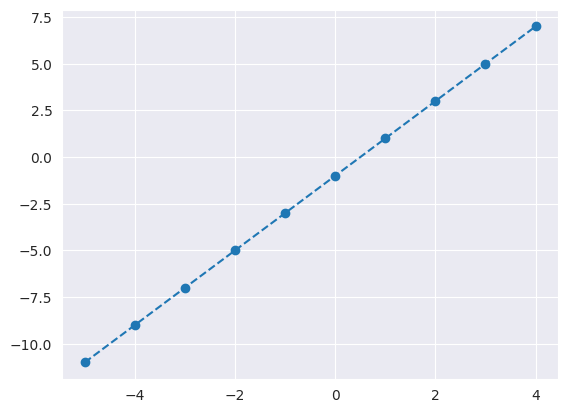

In [9]:
xs = np.arange(-5,5,1).astype('float32')
ys = xs * 2 - 1
plt.plot(xs , ys,'o--')

Model using **MSE** loss

In [10]:
import numpy as np

input = Input(shape=(1,), name="input_layer")
output_layer = Dense(1, name="output_layer")(input)
model_mse_loss = tf.keras.models.Model(inputs=input, outputs=output_layer)
model_mse_loss.compile(optimizer="sgd", loss="mse")
model_mse_loss.fit(xs, ys, epochs=500, verbose=0)

# Convert the list to a NumPy array
prediction_input = np.array([[10.0]])
prediction = model_mse_loss.predict(prediction_input)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[19.000086]]


In [11]:
model_mse_loss.get_weights()

[array([[2.0000036]], dtype=float32), array([-0.9999511], dtype=float32)]

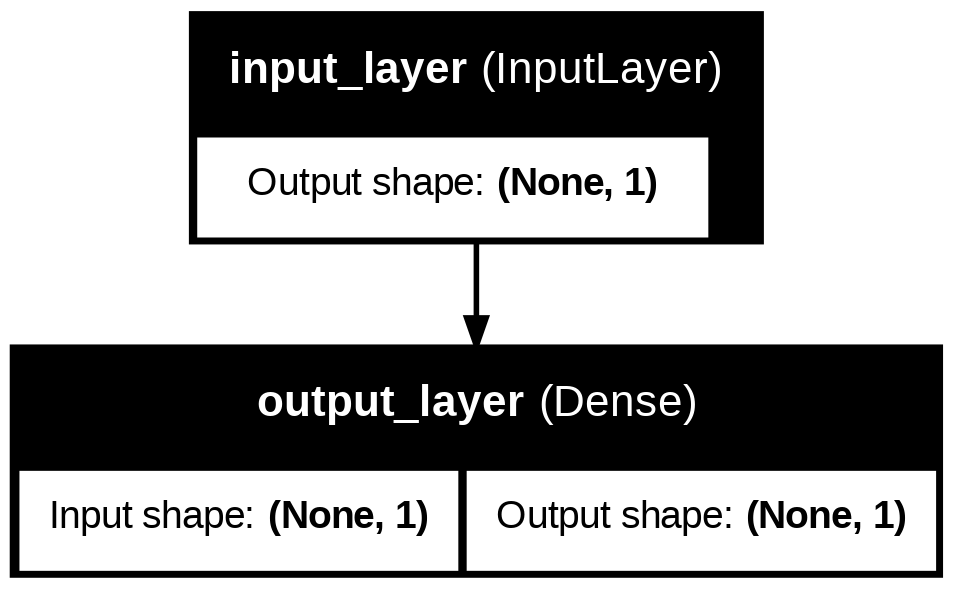

In [12]:
plot_model(model_mse_loss , to_file="mse_loss_model.png" , show_layer_names=True , show_shapes=True)

Model with **Huber** Loss

In [13]:
def huber_loss(y_true , y_pred):
    thresold = 1
    error = y_true - y_pred
    return_type = tf.abs(error) <= thresold
    r1 = 0.5 * tf.square(error)
    r2 = thresold * (tf.abs(error) - (0.5*thresold))
    return tf.where(return_type , r1 , r2)

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import Huber

input = Input(shape=(1,), name="input_layer")
output_layer = Dense(1, name="output_layer")(input)
model_huber_loss = tf.keras.models.Model(inputs=input, outputs=output_layer)
model_huber_loss.compile(optimizer="sgd", loss=Huber())
model_huber_loss.fit(xs, ys, epochs=500, verbose=0)

# Convert the list to a NumPy array
prediction_input = np.array([[10.0]])
prediction = model_huber_loss.predict(prediction_input)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[19.017107]]


In [19]:
model_huber_loss.get_weights()

[array([[2.0010421]], dtype=float32), array([-0.98429894], dtype=float32)]

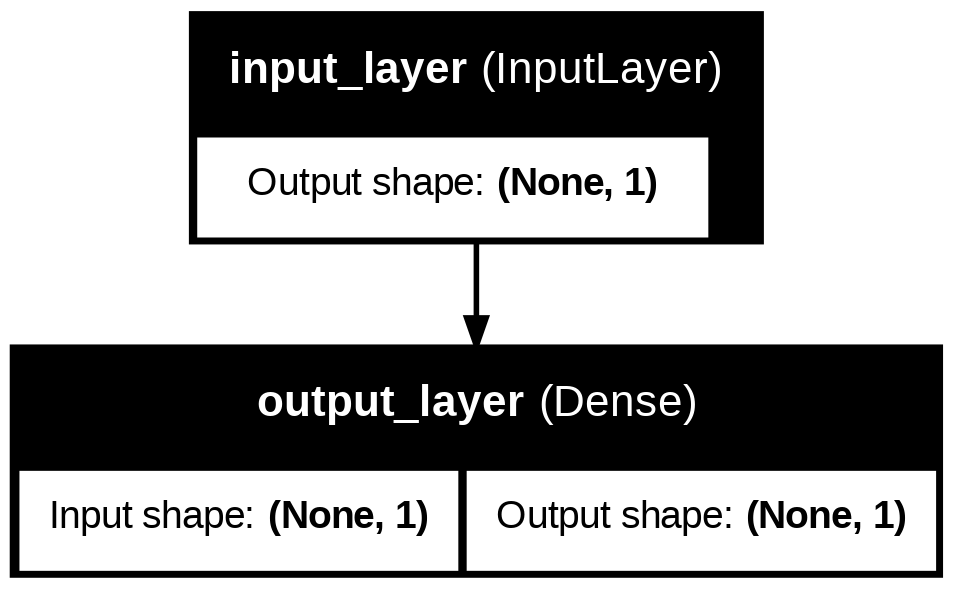

In [20]:
plot_model(model_huber_loss , to_file="huber_loss_model.png" , show_layer_names=True , show_shapes=True)